# Name: S. Jignyas Anand
# ID: 2100080021
# Branch: AI&DS

In [ ]:
!git clone https://github.com/JignyasAnand/Brain-Disease-Classification.git

Cloning into 'Brain-Disease-Classification'...
remote: Enumerating objects: 15683, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 15683 (delta 0), reused 10 (delta 0), pack-reused 15672
Receiving objects: 100% (15683/15683), 233.66 MiB | 18.65 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (18426/18426), done.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from pathlib import Path
import os
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import PIL

# Pre-process

In [ ]:
def structure_datasets(base_dir="/content/Brain-Disease-Classification/datasets"):
  for dataset in os.listdir(base_dir):
    ds_path = os.path.join(base_dir, dataset)
    print(ds_path)
    conts = os.listdir(ds_path)
    if ("train" in conts) and ("test" in conts):
      continue
    train_dir = os.path.join(ds_path, "Train")
    test_dir = os.path.join(ds_path, "Test")

    if os.path.isdir(train_dir) and os.path.isdir(test_dir):
      continue
    os.mkdir(train_dir)
    os.mkdir(test_dir)

    for class_name in conts:
      # img_paths = os.path.join(ds_path, os.listdir(os.path.join(ds_path, class_name)))
      img_paths = [os.path.join(ds_path, class_name, i) for i in os.listdir(os.path.join(ds_path, class_name))]
      labels = [class_name for i in range(len(img_paths))]
      if len(img_paths)==0:
        continue
      print(img_paths)
      x_train, x_test, _, _ = train_test_split(img_paths, labels, random_state=43, test_size=0.4)

      os.mkdir(os.path.join(train_dir, class_name))
      os.mkdir(os.path.join(test_dir, class_name))

      for img in x_train:
        shutil.copy(img, os.path.join(train_dir, class_name))

      for img in x_test:
        shutil.copy(img, os.path.join(test_dir, class_name))

      shutil.rmtree(os.path.join(ds_path, class_name))

structure_datasets()

/content/Brain-Disease-Classification/datasets/Brain Stroke
/content/Brain-Disease-Classification/datasets/Alzheimer_s Dataset
/content/Brain-Disease-Classification/datasets/Tumor


In [ ]:
def get_ds_splits(ds_name, base_dir="/content/Brain-Disease-Classification/datasets", target_size=(124, 124),ignore=False):
  IMAGE_SIZE = target_size
  ds_path = os.path.join(base_dir, ds_name)

  conts = os.listdir(ds_path)

  if ("Train" not in conts) or ("Test" not in conts):
    return "ERROR: Splits not detected"
  train_dir = os.path.join(ds_path, "Train")
  test_dir = os.path.join(ds_path, "Test")

  single_class = os.listdir(train_dir)[0]
  single_class_img = os.listdir(os.path.join(train_dir, single_class))[0]
  dims = np.asarray(PIL.Image.open(os.path.join(train_dir, single_class, single_class_img))).shape

  channels = None
  if len(dims)>=3:
    color_mode="rgb"
    channels = dims[-1]
  else:
    color_mode = "grayscale"
    channels=1
  if ignore:
    channels = 3
    color_mode = "rgb"
  print("COLOR MODE : ", color_mode)

  train_ds = image_dataset_from_directory(
      train_dir,
      color_mode = color_mode,
      image_size = IMAGE_SIZE,
      shuffle=True,
      seed = 21,
      batch_size = 32
  )


  test_ds = image_dataset_from_directory(
      test_dir,
      color_mode = color_mode,
      image_size = IMAGE_SIZE,
      batch_size = 32,
      shuffle=True,
      seed = 21
  )


  return channels, train_ds, test_ds

In [ ]:
channels, train_ds, test_ds = get_ds_splits("Tumor",ignore=True)

COLOR MODE :  rgb
Found 4213 files belonging to 4 classes.
Found 1684 files belonging to 4 classes.


In [ ]:
import os
from PIL import Image

base_dir = "/content/Brain-Disease-Classification/datasets/Tumor/Train/"

for i in os.listdir(base_dir):
  class_dir = os.path.join(base_dir, i)
  for img in os.listdir(class_dir):
    img_path = os.path.join(class_dir, img)
    x = Image.open(img_path)
    x.show()
    print(img_path)
    break
  break

/content/Brain-Disease-Classification/datasets/Tumor/Train/notumor/Te-no_0403.jpg


In [ ]:
x = Image.open("/content/Brain-Disease-Classification/datasets/Tumor/Train/notumor/Te-no_0403.jpg")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plt.imshow(np.array(x))
print(np.array(x).shape)

(225, 225, 3)


In [ ]:
def resize_and_save(img_path, img_name):
  x = Image.open(img_path)
  x = x.resize((124, 124))
  x = x.convert("RGB")
  x.save(img_name)

base_dir = "/content/Brain-Disease-Classification/datasets/Tumor/Train/"

for ds in os.listdir(base_dir):
  train_dir = os.path.join(bs)

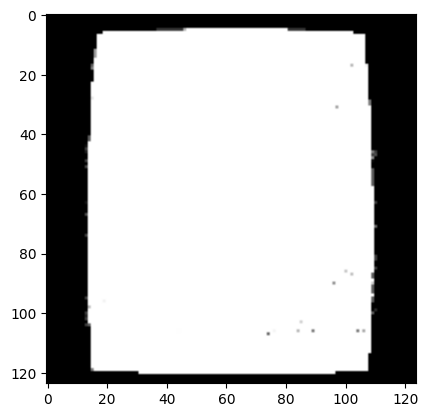

In [ ]:
import matplotlib.pyplot as plt

for i in train_ds:
  plt.imshow()
  break

In [ ]:
dataset_labels = train_ds.class_names

In [ ]:
print(train_ds.class_names)
assert train_ds.class_names == test_ds.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']


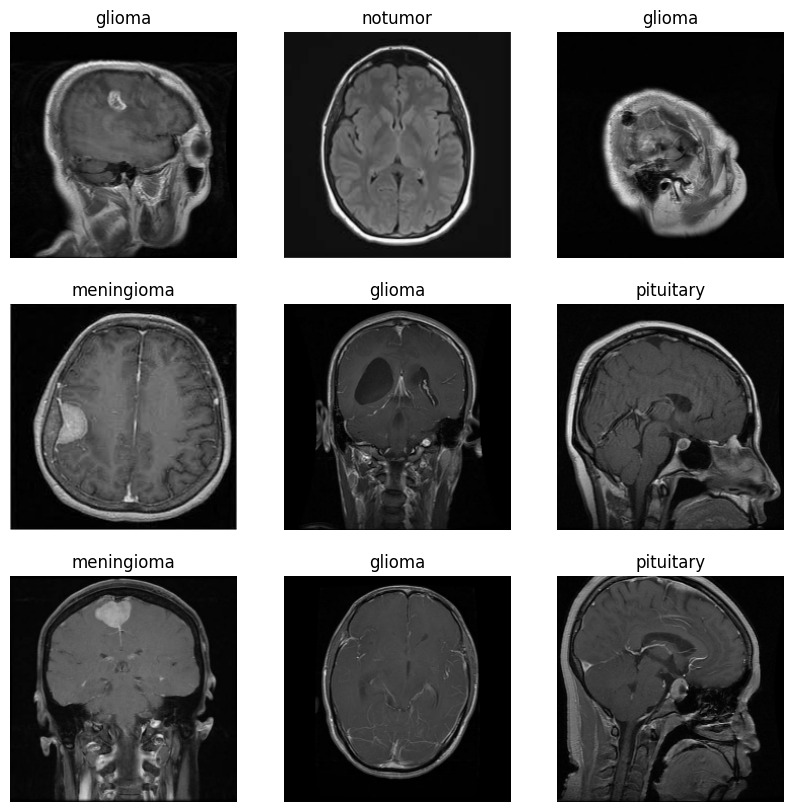

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
NUM_CLASSES = len(train_ds.class_names)
def one_hot_label(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

train_ds = train_ds.map(one_hot_label, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(one_hot_label, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.data import AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
NUM_IMAGES = []

train_dir = "/content/Brain-Disease-Classification/datasets/Alzheimer_s Dataset/Train"
for cname in os.listdir(train_dir):
  NUM_IMAGES.append(len(os.listdir(os.path.join(train_dir, cname))))
print(NUM_IMAGES)

[38, 1344, 1920, 537]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import PIL

In [ ]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )

    return block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block

def get_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(224, 224, 3)),

        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),

        conv_block(32),
        conv_block(64),

        conv_block(128),
        tf.keras.layers.Dropout(0.2),

        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    return model

In [ ]:
adam_model = get_model()
# adam_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])
METRICS = [tf.keras.metrics.AUC(name='auc')]

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("tumor.h5",
                                                    save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
CALLBACKS = [checkpoint_cb, early_stopping_cb]
adam_model.compile(
    optimizer='adam',
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=METRICS
)
history = adam_model.fit(
    train_ds,
    epochs=5,
    validation_data=test_ds,
    callbacks = CALLBACKS
)


Epoch 1/5
132/132 [==============================] - ETA: 0s - loss: 1.0740 - auc: 0.8242

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 [==============================] - 28s 155ms/step - loss: 1.0740 - auc: 0.8242 - val_loss: 2.0468 - val_auc: 0.4990
Epoch 2/5
132/132 [==============================] - 19s 148ms/step - loss: 0.7135 - auc: 0.9155 - val_loss: 4.1708 - val_auc: 0.4993
Epoch 3/5
132/132 [==============================] - 17s 126ms/step - loss: 0.5804 - auc: 0.9421 - val_loss: 4.2146 - val_auc: 0.5449
Epoch 4/5
132/132 [==============================] - 19s 145ms/step - loss: 0.5217 - auc: 0.9519 - val_loss: 3.5238 - val_auc: 0.6049
Epoch 5/5
132/132 [==============================] - 17s 126ms/step - loss: 0.4191 - auc: 0.9682 - val_loss: 2.1107 - val_auc: 0.7623


In [ ]:
adam_model.save("brain_stroke.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp tumor.h5 '/content/gdrive/MyDrive/downloads/'
!ls -lt '/content/gdrive/MyDrive/downloads/'

total 156026
-rw------- 1 root root 79885888 Apr  7 06:54 tumor.h5
-rw------- 1 root root 79883424 Apr  7 06:50 brain_stroke.h5


In [ ]:
!zip -r alzc.zip alzc.keras

  adding: alzc.keras (deflated 22%)


In [ ]:
model2=tf.keras.models.load_model('alzc.keras')


In [ ]:
adam_model.save_weights("alzc.weights.h5")
